![](/Users/toelou/Desktop/GDP2023.jpg)

### Global Economy 2023

According to Pallavi Rao's [article on the VisualCapitalist](https://www.visualcapitalist.com/visualizing-the-105-trillion-world-economy-in-one-chart/):

"By the end of 2023, the world economy is expected to have a gross domestic product (GDP) of \\$105 trillion, or $5 trillion higher than the year before, according to the latest International Monetary Fund (IMF) projections from its [2023 World Economic Outlook report.](https://www.imf.org/external/datamapper/NGDPD@WEO/OEMDC/ADVEC/WEOWORLD)... They year started with turmoil for the global ecoonomy, with financial markets rocked by the collapse of several mid-sized U.S. banks alongside persistent inflation and tightening monetary conditions in most countries. Nevertheless, some economies have proven to be resilient, and are expeted to register growth from 2022.

The U.S. is expected to continue being the biggest economy in 2023 with a projected GDP of $26.9 trillion for the year. This is more than the sum of the GDPs of 174 countries ranked from Indonesia (17th) to Tuvalu (191st).

China stays steady at second place with a projected $19.4 trillion GDP in 2023. Most of the top-five economies remain in the same positions from 2022, with one notable exception.

India is expected to climb past the UK to become the fifth-largest economy with a projected 2023 GDP of $3.7 trillion.

Here’s a look at the size of every country’s economy in 2023, according to IMF’s estimates."

**References/Works Cited**

Rao, P. (2023, October 25). Visualizing the $105 Trillion World Economy in One Chart. Visual Capitalist. https://www.visualcapitalist.com/visualizing-the-105-trillion-world-economy-in-one-chart/ 

Franco, D. (2022, October 3). A visual guide to Time Series Decomposition Analysis. Encora. 
https://www.encora.com/insights/a-visual-guide-to-time-series-decomposition-analysis 

**Note**

To assess  the data I'll be performing statistical analyses and implementing a Recurrent Neural Network for making predictions.

### Recurrent Neural Networks

Neural Networks with a modification to tackle sequence based data. Examples include:

- Video Analysis: Video captioninig, tracking objects in video sequences, action recognition
- Audio + Music, Music composition by generating music and composing new pieces by learning patterns and structures from existing music data
- Handwriting Recognition: Sentences
- Speech Synthesis: RNNs can be used in text-to-speech (TTS) systems to convert text into spoken language with natural-sounding intonation
- Time Series Data: RNNs can be used for energy consumption prediction, weather forecasting, and demand forecasting in supply chain management

**Important Recurrent Neural Network Notes**
- Recurrent Neurons send outputs back to itself at different time states
- Cells that are a function of inputs from previous time steps are also known as *memory cells*.
- RNNs are flexible in their inputs and outputs, for both sequences and single vector values.


**Long Short Term Memory Units (LSTM) and (GRU)**
- RNNs tend to "forget" the first inputs, as information is lost at each step going through the RNN.
- Thus, the need for "long-term memory" from these Neural Networks.
- Notes about cell states, forget gate layer, and using them in a function

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ![](https://www.visualcapitalist.com/wp-content/uploads/2023/08/global-economy-2023-1200px.jpg)

In [30]:
# Data: FRED Economic Research Gross Domestic Product
df = pd.read_csv('/Users/toelou/Desktop/GDP.csv', index_col = 'DATE', parse_dates = True)

# Set the frequency of the index of the DataFrame to Quarter Start, January
df.index.freq = 'QS-JAN'

In [14]:
df.head()

,GDP
DATE,
1947-01-01,243.164
1947-04-01,245.968
1947-07-01,249.585
1947-10-01,259.745
1948-01-01,265.742


In [15]:
df.index.min()

Timestamp('1947-01-01 00:00:00')

<Axes: xlabel='DATE'>

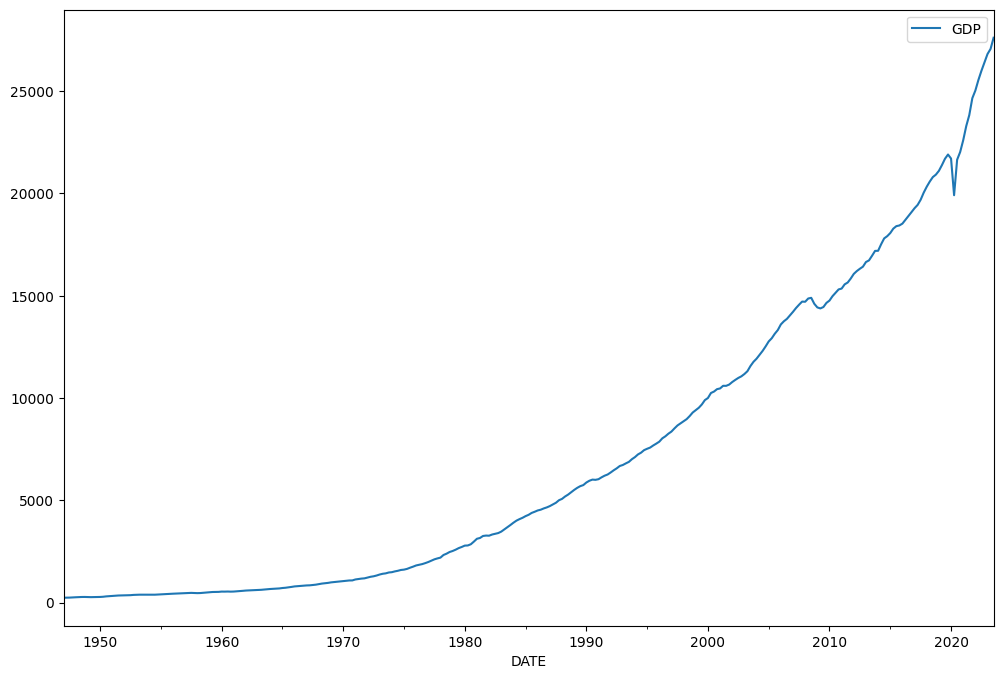

In [16]:
df.plot(figsize = (12, 8))

In [17]:
# Decompose this data into its seasonal components
from statsmodels.tsa.seasonal import seasonal_decompose

In [18]:
results = seasonal_decompose(df['GDP'])

<Axes: xlabel='DATE'>

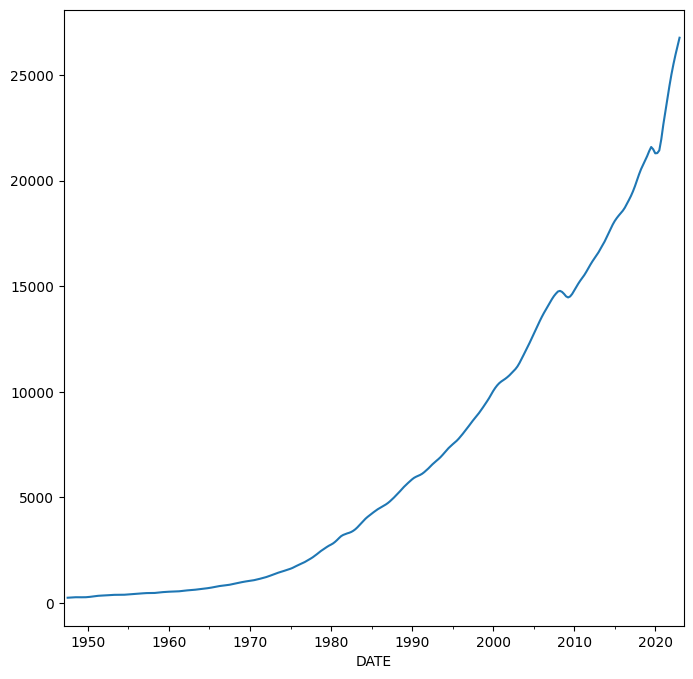

In [23]:
results.trend.plot(figsize = (8, 8))

<Axes: xlabel='DATE'>

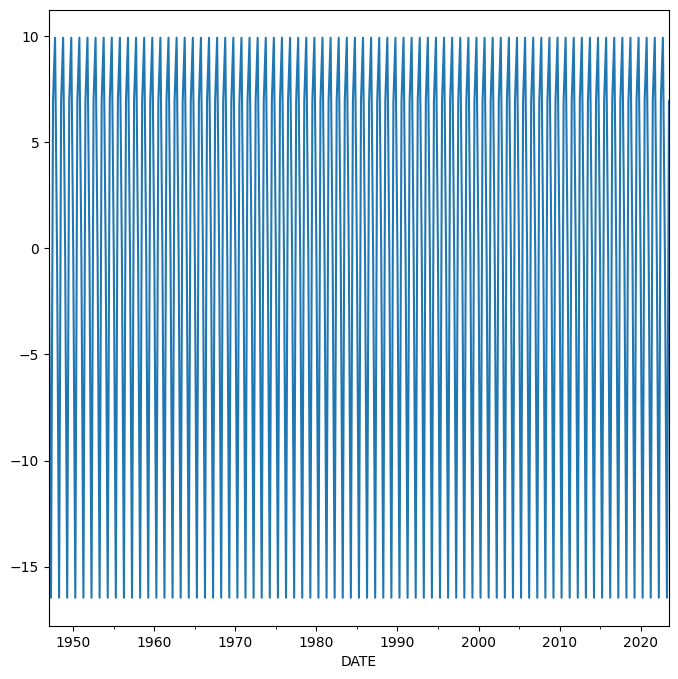

In [25]:
results.seasonal.plot(figsize = (8, 8))

<Axes: xlabel='DATE'>

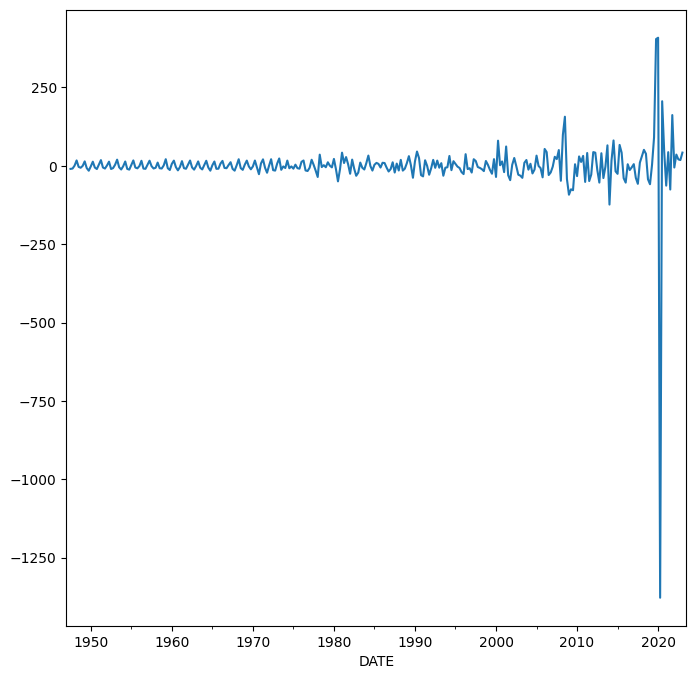

In [26]:
results.resid.plot(figsize = (8, 8))

In [27]:
# Provide the series correspoinding with seasonal data
results.seasonal

DATE
1947-01-01    -0.416590
1947-04-01   -16.468176
1947-07-01     6.952074
1947-10-01     9.932691
1948-01-01    -0.416590
                ...    
2022-07-01     6.952074
2022-10-01     9.932691
2023-01-01    -0.416590
2023-04-01   -16.468176
2023-07-01     6.952074
Freq: QS-JAN, Name: seasonal, Length: 307, dtype: float64

In [28]:
len(df)

307

### Important Notes

In general, if I wanted to forecast on data that had a monthly frequency then I would subtract 12 from the data set and assign the final 12 values of the data set as the test set. **But why is this important?**

Since I have an df.index.freq of QS (Quarterly Start), that means my data is in blocks where each point represents January-March, April-June, July-September, October-December. Basically, the forecast horizon is of four quarters where each quarter represents a span of three months.

#### **In other words, this effects my model approach. Here are a approaches to consider:**
1. Direct Forecasting: I could directly forecast the four future quarters. This approach is straightforward but runs the risk of not capturing nuances between the quarters.

2. Disaggregation: Consider the fact that a more granular forecast may be needed, it may be important to just forecast based on months and not quarters. It should be noted that my current Quarterly Start approach adds uncertanity and complexity to the model because I am estimating values in quarters.

3. External models for disaggregation: some models aid in disaggregating quarterly data into monthly forefcasts when you implement statistical or machine learning techniques.

#### **Training Data Length**
As in the case of monthly data, the length of training data impacts the forecast. I'm nothing that with quarterly I technically have fewer data points for the same time span. This means the model can be more sensitive to the length of the training data. I should technically have 3 times as many rows. 

In [31]:
# Note the data is of a quarterly frequency, forecast 12 months into the future
# Subtract 4 from current length: 307 - 4 = 303; this is the length of our training data
train = df.iloc[:303]
test = df.iloc[303:]

In [32]:
test

,GDP
DATE,
2022-10-01,26408.405
2023-01-01,26813.601
2023-04-01,27063.012
2023-07-01,27610.128


In [34]:
# They match, good!
df.tail(4)

,GDP
DATE,
2022-10-01,26408.405
2023-01-01,26813.601
2023-04-01,27063.012
2023-07-01,27610.128


### Scaling the Data

Normalization values for this Gross Domestic Product (GDP) data can be valuable for a number of reasons:

- Normalization of Scale: GDP values can vary significantly between different time periods so scaling them puts them on a common range (generally between 0 and 1). This can be important for working with data from different sources or when the data includes both gargantuan and smaller economies.
- Improved algorithm performance: many machine learning algorithms, particularly those using gradient descent as an optimization technique (like linear regression or neural networks) perform better when input features are scaled. This is because features on the same scale can help the algorithm converge faster and reduce the changes of getting stuck in local optima. 
- Maintaining relative differences: The MinMaxScaler preserves the relationships in the data since it's a linear scaling. This means that although the absolute values of GDP are transformed, their relative differences remain the same. This is important in time series analysis where the trend and seasonality are key factors.
- Non-stationarity?: GDP data can also be non-stationary which means that the statistical properties like variance and mean can change over time. Scaling won't make the data stationary, but it can mitigate the effects of large variations in the scale of the data which can in turn make it more manageable for certain types of models.
- Preparing for Feature Engineering: If you plan to combine GDP data with other variabels (inflation, unemployment rates, among other pieces of data) in a multivariate time series model, scalling ensures that all the variabels are on a similar scale, thus avoiding any variable being dominated by another due to its scale. 

In [35]:
# We only fit on the training data is because we don't want to cheat and assume future information about the test data set
# Fit scaler to training data, you won't be able to scale to data forecasted into the future

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [36]:
# Only fit to the training data. 
# If you fit to all the data you're cheating by assuming future knowledge about the test set. 
# In reality, you can only scale to your current known data. When forecasting to the future, you won't know the scale of that data.
# This finds the max value in the training data.

scaler.fit(train)

MinMaxScaler()

In [37]:
'''
The transformation is given by::

    The fitting equation: X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
    The transformation equation: X_scaled = X_std * (max - min) + min
'''

# Transform procedure divides by the maximum value.
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [38]:
# How does one feed batches of this time series data along with the label into the model?
# Keras has a preprocessing time series object to do this.

from keras.preprocessing.sequence import TimeseriesGenerator

2024-01-15 13:57:19.478973: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [39]:
# Amount of inputs into the model, and the number of y steps I want to predict into the future
n_input = 3
n_features = 1

"""
    Function: TimeseriesGenerator()
    
    Docstring: This class takes in a sequence of data-points gathered at
    equal intervals, along with time series parameters such as
    stride, length of history, etc., to produce batches for
    training/validation.
    
    Args: data, targets, length, sampling_rate=1, stride = 1, start_index = 0, end_index = None, shuffle = False, reverse = False,
    batch_size = 128
"""

generator = TimeseriesGenerator(scaled_train, scaled_train, length = n_input, batch_size = 1)
# defines inputs and predicts target variable into the future

In [40]:
print(len(scaled_train))
print(len(generator))

303
300


In [41]:
# Generator object produces a tuple
generator[0]

(array([[[0.        ],
         [0.00010889],
         [0.00024934]]]),
 array([[0.00064389]]))

In [42]:
X, y = generator[0]

In [45]:
X

array([[[0.        ],
        [0.00010889],
        [0.00024934]]])

In [46]:
y

array([[0.00064389]])

In [47]:
# Data has 3 dimensions
X.shape

(1, 3, 1)

### Building the Model

In [48]:
# Import requisite libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [49]:
n_input = 4 # to represent the number of quarters
n_features = 1 # this represents the number of columns I have which is one, the GDP prices

train_generator = TimeseriesGenerator(scaled_train, scaled_train, length = n_input, batch_size = 1)

In [51]:
model = Sequential()
model.add(LSTM(200, activation = 'relu', input_shape = (n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

In [52]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 200)               161600    
                                                                 
 dense_1 (Dense)             (None, 1)                 201       
                                                                 
Total params: 161801 (632.04 KB)
Trainable params: 161801 (632.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [53]:
model.fit_generator(train_generator, epochs = 25)

Epoch 1/25


/var/folders/zg/50f5fmqn6779yg0r2s2jjbvr0000gn/T/ipykernel_2008/976313994.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_generator, epochs = 25)


299/299 [==============================] - 2s 3ms/step - loss: 0.0094
Epoch 2/25
299/299 [==============================] - 1s 2ms/step - loss: 2.9777e-04
Epoch 3/25
299/299 [==============================] - 1s 2ms/step - loss: 3.1904e-04
Epoch 4/25
299/299 [==============================] - 1s 2ms/step - loss: 4.1868e-04
Epoch 5/25
299/299 [==============================] - 1s 2ms/step - loss: 2.7548e-04
Epoch 6/25
299/299 [==============================] - 1s 2ms/step - loss: 6.2582e-04
Epoch 7/25
299/299 [==============================] - 1s 2ms/step - loss: 7.4193e-04
Epoch 8/25
299/299 [==============================] - 1s 2ms/step - loss: 2.3331e-04
Epoch 9/25
299/299 [==============================] - 1s 2ms/step - loss: 3.7264e-04
Epoch 10/25
299/299 [==============================] - 1s 2ms/step - loss: 2.6749e-04
Epoch 11/25
299/299 [==============================] - 1s 2ms/step - loss: 4.3554e-04
Epoch 12/25
299/299 [==============================] - 1s 2ms/step - loss: 2.5

In [54]:
# Loss eventually converges. Let's plot the loss values.

model.history.history.keys()

dict_keys(['loss'])

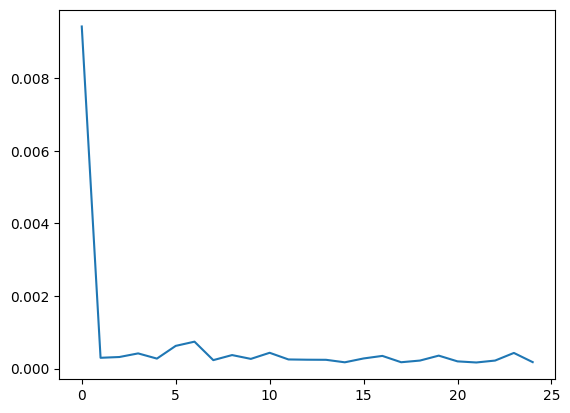

In [55]:
myloss = model.history.history['loss']
plt.plot(range(len(myloss)), myloss)

In [56]:
# Evaluate this on the test data
# 4 quarters of history steps ---> Predict next quarter
# Need last 4 points of training data ---> to predict 1 point of test data

first_eval_batch = scaled_train[-4:]
first_eval_batch

array([[0.94796275],
       [0.96250611],
       [0.98251106],
       [1.        ]])

In [57]:
# Difference is the number of brackets
first_eval_batch = first_eval_batch.reshape(1, n_input, n_features)

In [58]:
model.predict(first_eval_batch)

1/1 [==============================] - 0s 143ms/step


array([[1.0318612]], dtype=float32)

**The prediction above means that given that the model is designed to take the 4 quarters and predict the next one outside the data. This prediction represents the first point of the test data set.**

### Forecasting using Recurrent Neural Network Model

In [75]:
# Holding the predictions so you can later plot them
test_predictions = [] 

# Ensure NumPy arrays are in correct dimensions; last n_input points from the training set
# Grab first evaluation batch using 4 quarters of historical values to predict x quarters/years into the future
first_eval_batch = scaled_train[-n_input:]

# Reshape this to the format the RNN wants (same format as TimeseriesGenerator)
current_batch = first_eval_batch.reshape((1, n_input, n_features))

# How far into the future will I forecast?
# Let's predict 1 year into the future; len(test) --> 4 instead
for i in range(4):
    
    # One timestep ahead of historical 4 points
    # Only want the prediction value
    # adding [0] gets rid of the double brackets
    current_pred = model.predict(current_batch)[0]  
    
    # Store that prediction
    test_predictions.append(current_pred)
    
    # Update current batch to include prediction
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis = 1)

1/1 [==============================] - 0s 14ms/step


In [76]:
# The predictions on the test set
test_predictions

[array([1.0318612], dtype=float32),
 array([1.0566581], dtype=float32),
 array([1.0834328], dtype=float32),
 array([1.1122849], dtype=float32)]

In [77]:
true_predictions = scaler.inverse_transform(test_predictions)

In [78]:
true_predictions

array([[26815.11153546],
       [27453.66990148],
       [28143.15649901],
       [28886.14076324]])

In [79]:
test

,GDP
DATE,
2022-10-01,26408.405
2023-01-01,26813.601
2023-04-01,27063.012
2023-07-01,27610.128


In [80]:
test['Predictions'] = true_predictions

/var/folders/zg/50f5fmqn6779yg0r2s2jjbvr0000gn/T/ipykernel_2008/4269337381.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


In [81]:
test

,GDP,Predictions
DATE,,
2022-10-01,26408.405,26815.111535
2023-01-01,26813.601,27453.669901
2023-04-01,27063.012,28143.156499
2023-07-01,27610.128,28886.140763


<Axes: xlabel='DATE'>

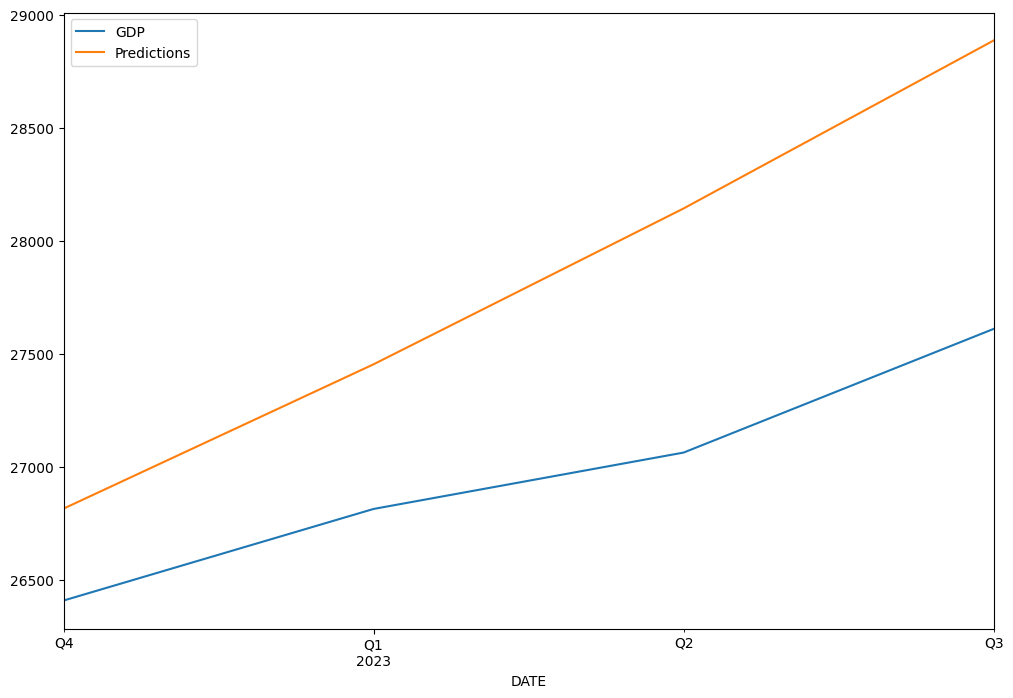

In [82]:
test.plot(figsize = (12, 8))

The model doesn't have the best predictive strength and doesn't fully capture the nuances of the GDP growth. 

There will be randomness in RNN and you may not get exact values
Value should align. Predictions may need more training with more epochs.

Saving model can be done below:
- model.save('mycoolmodel.h5')

Loading Model
Loading can be done by doing the following:
- new_model = load_model('mycoolmodel.h5')
- new_model.summary()